In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/rameenfatima13/titanic/titanic.csv
/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


Accuracy: 0.72


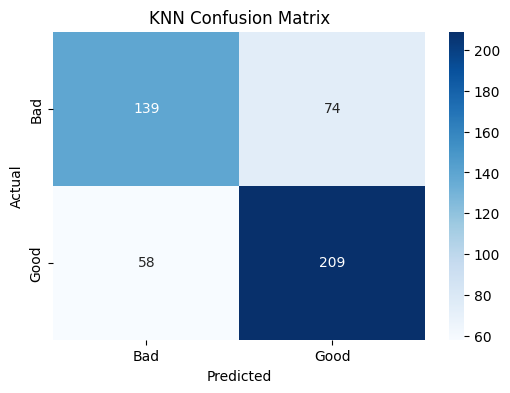

Classification Report:
              precision    recall  f1-score   support

         Bad       0.71      0.65      0.68       213
        Good       0.74      0.78      0.76       267

    accuracy                           0.73       480
   macro avg       0.72      0.72      0.72       480
weighted avg       0.72      0.72      0.72       480



In [12]:
# 📚 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 🔹 Load dataset (Kaggle path)
df = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

# 🔍 Convert quality to binary: 1 = good (>=6), 0 = bad (<6)
df["quality"] = df["quality"].apply(lambda x: 1 if x >= 6 else 0)

# 🔹 Features and target
X = df.drop("quality", axis=1)
y = df["quality"]

# 📦 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 📏 Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🔎 Train and Evaluate KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# 🎯 Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

# 📊 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Bad","Good"], yticklabels=["Bad","Good"])
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 📋 Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Bad","Good"]))

# 📈 Accuracy vs. K Value
error_rates = []
accuracies = []

for k in range(1, 21):
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train, y_train)
    pred_k = knn_k.predict(X_test)
    error_rates.append(np.mean(pred_k != y_test))
    accuracies.append(accuracy_score(y_test, pred_k))

plt.figure(figsize=(10,5))
plt.plot(range(1,21), accuracies, marker='o', linestyle='-', color='green')
plt.title("K Value vs Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.xticks(range(1,21))
plt.grid(True)
plt.show()


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Ac

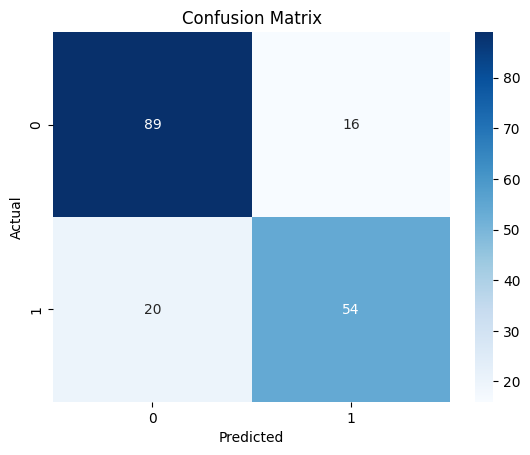

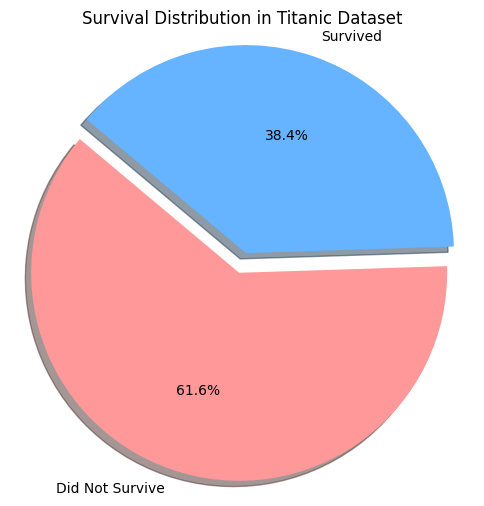

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df = pd.read_csv("/kaggle/input/d/rameenfatima13/titanic/titanic.csv")

print(df.head())


df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)


df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})


df["Age"] = df["Age"].fillna(df["Age"].median())


X = df.drop("Survived", axis=1)
y = df["Survived"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

labels = ["Did Not Survive", "Survived"]
sizes = df["Survived"].value_counts()
colors = ["#ff9999","#66b3ff"]
explode = (0.05, 0.05)

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=140, explode=explode, shadow=True)
plt.title("Survival Distribution in Titanic Dataset")
plt.axis('equal')  
plt.show()
